In this notebook, we plot the conditional/unconditional probabilties for the single base substitution events.

Import the necessary libraries.

In [1]:
import modules.sbs as sbs
import numpy as np
import os
import matplotlib.pyplot as plt
from itertools import product


helper = sbs.SBS("SARS-CoV-2")

Export the figures to `outputs-figures`.

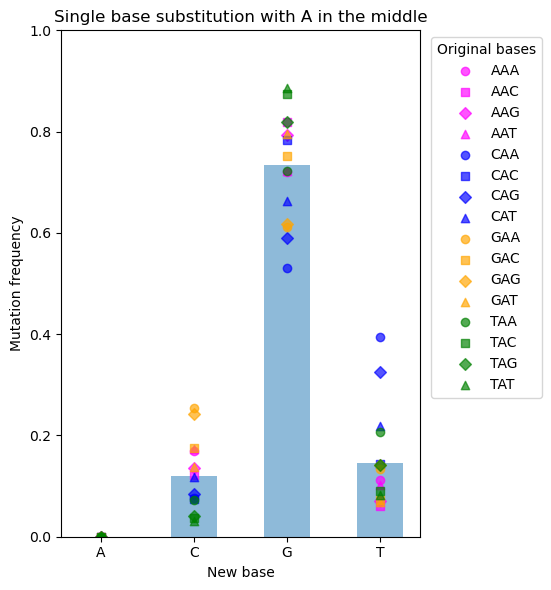

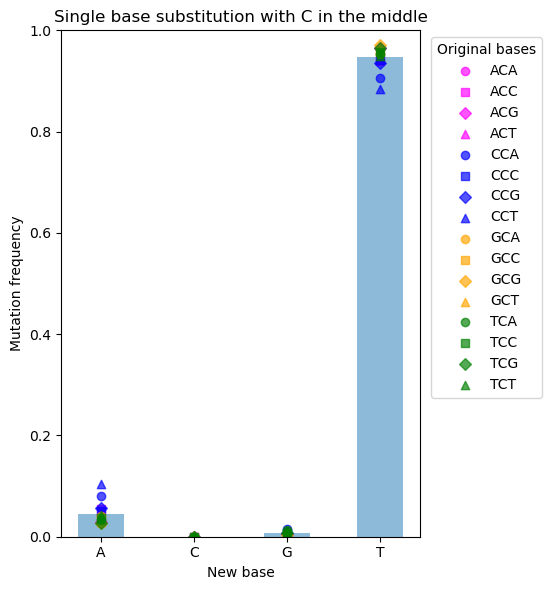

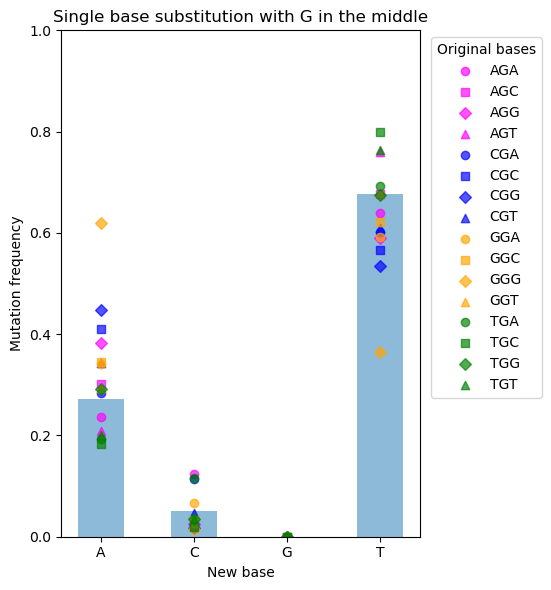

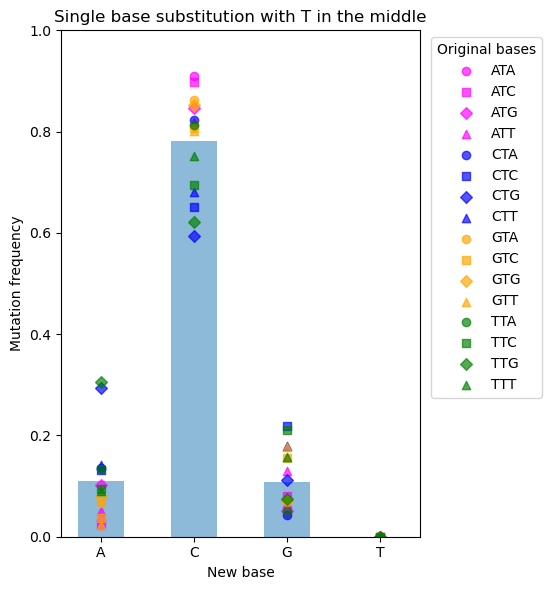

In [ ]:
colors = ["magenta", "blue", "orange", "green"]
shapes = ["o", "s", "D", "^"]
BASE = ["A", "C", "G", "T"]

# Make the output directory if it does not exist
if not os.path.exists("outputs-figures"):
    os.makedirs("outputs-figures")

# Plot the unconditional and conditional mutation probabilities for each base
for a in BASE:
    fig, ax = plt.subplots(figsize=(6, 6))
    new_bases = BASE
    x = np.arange(len(new_bases))

    # Plot the unconditional mutation probabilities
    mut_probs = np.array([helper[f"_{a}_", b] for b in new_bases], dtype=float)
    mut_probs /= mut_probs.sum()
    ax.bar(x, mut_probs, width=0.5, label=f"_{a}_", alpha=0.5)

    # Plot the conditional mutation probabilities
    for i, j in product(x, repeat=2):
        al = new_bases[i]
        ar = new_bases[j]
        mut_probs = np.array([helper[f"{al}{a}{ar}", b] for b in new_bases], dtype=float)
        mut_probs /= mut_probs.sum()

        ax.scatter(x, mut_probs, color=colors[i], marker=shapes[j], label=f"{al}{a}{ar}", alpha=0.67)

    ax.set_xticks(x)
    ax.set_xticklabels(new_bases)
    ax.set_xlabel("New base")
    ax.set_ylabel("Mutation frequency")
    ax.set_title(f"Single base substitution with {a} in the middle")
    ax.legend(title="Original bases", loc="upper right", bbox_to_anchor=(1.36, 1))
    ax.set_ylim(0, 1)
    plt.tight_layout()
    plt.savefig(f"outputs-figures/sbs_{a}.pdf", dpi=300, bbox_inches="tight")
    plt.show(fig)